# Exploratory Data Analysis

## Goal of this Notebook:

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. In this notebook we'll do some exploratory data analysis. However, since we don't have our features created yet, we cannot do much at this point. For this reason, only a shallow analysis will be done at this point.

- For the analysis, we are going to look for the most common words and create word clouds for each channel of communications.

In [1]:
import json
import pickle
import pandas as pd
from collections import Counter
from sklearn.feature_extraction import text # Contains the stop word list
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

In [2]:
data_clean = pd.read_pickle('Pickles/term_matrix.pickle')

#Transpose becuse it's harder to operate across rows. Easier across columns.
#We want to aggregate for each channel. So CHATS, EMAILS and SMS should be on the columns.
data = data_clean.transpose() 
data.head()

,CHATS,EMAILS,SMS
able,1,3,0
abn,0,2,0
accelerated,0,1,0
accelerating,0,1,0
accenture,0,5,0


## 1. Find top words

In [3]:
# Find the top 30 words for each channel of communication
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'CHATS': [('hi', 15),
  ('long', 11),
  ('going', 10),
  ('john', 10),
  ('short', 9),
  ('time', 9),
  ('good', 7),
  ('trading', 7),
  ('like', 6),
  ('risk', 6),
  ('yeah', 6),
  ('chart', 6),
  ('trade', 6),
  ('phil', 5),
  ('guys', 5),
  ('dont', 5),
  ('today', 4),
  ('moment', 4),
  ('looking', 4),
  ('later', 4),
  ('hello', 4),
  ('right', 4),
  ('look', 4),
  ('eurgbp', 4),
  ('closed', 3),
  ('profit', 3),
  ('alright', 3),
  ('day', 3),
  ('hows', 3),
  ('steve', 3)],
 'EMAILS': [('email', 92),
  ('buy', 80),
  ('information', 54),
  ('phillip', 50),
  ('message', 44),
  ('click', 32),
  ('downgraded', 32),
  ('account', 31),
  ('use', 31),
  ('thanks', 28),
  ('need', 28),
  ('subject', 28),
  ('know', 27),
  ('original', 27),
  ('new', 27),
  ('enron', 27),
  ('request', 27),
  ('password', 26),
  ('time', 25),
  ('review', 25),
  ('strong', 25),
  ('recipient', 24),
  ('sent', 23),
  ('like', 23),
  ('let', 22),
  ('change', 22),
  ('receive', 22),
  ('price', 21),
  (

In [4]:
# Print the top 15 words used by each channel
for channel, top_words in top_dict.items():
    print(channel)
    print(', '.join([word for word, count in top_words[0:15]]))
    print('---')

CHATS
hi, long, going, john, short, time, good, trading, like, risk, yeah, chart, trade, phil, guys
---
EMAILS
email, buy, information, phillip, message, click, downgraded, account, use, thanks, need, subject, know, original, new
---
SMS
鞋子全部打湿完了, γλώσσας, email, say, maltija, xd, eżempju, thx, ejemplo, morons, saluti, língua, getting, happened, critical
---


We see that on channel SMS, there are lot of non english words. Maybe this channel is used mostly for casual and family conversation. This is only an assumption though, further analysis and langage translation must be done to better undersdand the content of messages.

 By looking at these top words, we can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

## 2. Create a list of stop words

In [5]:
# Look at the most common top words and add them to the stop word list

# Let's first create a list that just has each channel top 30 words (even if repeated)
words = []
for chanel in data.columns:
    top = [word for (word, count) in top_dict[chanel]]
    for t in top:
        words.append(t)
        
words

['hi',
 'long',
 'going',
 'john',
 'short',
 'time',
 'good',
 'trading',
 'like',
 'risk',
 'yeah',
 'chart',
 'trade',
 'phil',
 'guys',
 'dont',
 'today',
 'moment',
 'looking',
 'later',
 'hello',
 'right',
 'look',
 'eurgbp',
 'closed',
 'profit',
 'alright',
 'day',
 'hows',
 'steve',
 'email',
 'buy',
 'information',
 'phillip',
 'message',
 'click',
 'downgraded',
 'account',
 'use',
 'thanks',
 'need',
 'subject',
 'know',
 'original',
 'new',
 'enron',
 'request',
 'password',
 'time',
 'review',
 'strong',
 'recipient',
 'sent',
 'like',
 'let',
 'change',
 'receive',
 'price',
 'thank',
 'shares',
 '鞋子全部打湿完了',
 'γλώσσας',
 'email',
 'say',
 'maltija',
 'xd',
 'eżempju',
 'thx',
 'ejemplo',
 'morons',
 'saluti',
 'língua',
 'getting',
 'happened',
 'critical',
 'immediately',
 'results',
 'ένα',
 'αυτό',
 'hell',
 'hello',
 'asap',
 'exemplo',
 'olá',
 'jest',
 'open',
 'wdim',
 'español',
 'języka',
 'esempio']

In [6]:
# Aggregate this list and identify the most common words along with how many channel's routines they occur in
Counter(words).most_common()

[('time', 2),
 ('like', 2),
 ('hello', 2),
 ('email', 2),
 ('hi', 1),
 ('long', 1),
 ('going', 1),
 ('john', 1),
 ('short', 1),
 ('good', 1),
 ('trading', 1),
 ('risk', 1),
 ('yeah', 1),
 ('chart', 1),
 ('trade', 1),
 ('phil', 1),
 ('guys', 1),
 ('dont', 1),
 ('today', 1),
 ('moment', 1),
 ('looking', 1),
 ('later', 1),
 ('right', 1),
 ('look', 1),
 ('eurgbp', 1),
 ('closed', 1),
 ('profit', 1),
 ('alright', 1),
 ('day', 1),
 ('hows', 1),
 ('steve', 1),
 ('buy', 1),
 ('information', 1),
 ('phillip', 1),
 ('message', 1),
 ('click', 1),
 ('downgraded', 1),
 ('account', 1),
 ('use', 1),
 ('thanks', 1),
 ('need', 1),
 ('subject', 1),
 ('know', 1),
 ('original', 1),
 ('new', 1),
 ('enron', 1),
 ('request', 1),
 ('password', 1),
 ('review', 1),
 ('strong', 1),
 ('recipient', 1),
 ('sent', 1),
 ('let', 1),
 ('change', 1),
 ('receive', 1),
 ('price', 1),
 ('thank', 1),
 ('shares', 1),
 ('鞋子全部打湿完了', 1),
 ('γλώσσας', 1),
 ('say', 1),
 ('maltija', 1),
 ('xd', 1),
 ('eżempju', 1),
 ('thx', 1),
 ('

 Looks like all these meaningless words appears less than 5 times in our dataset, then no need to remove them

## 3. Visualization of the most commun words

In [7]:
# Use the clean corpus 
data_clean = pd.read_pickle('Pickles/clean_corpus.pickle')

In [8]:
# Let's make some word clouds
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

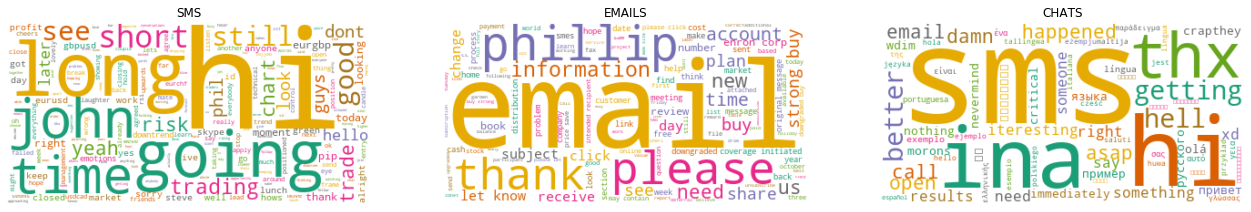

In [9]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [30, 20]

channel_names = ['SMS', 'EMAILS', 'CHATS']

# Create subplots for each channel 
for index, chan in enumerate(data.columns):
    wc.generate(data_clean.Messages[chan])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(channel_names[index])
    
plt.show()

 
More cleaning needs to be done as the most commun words for each channel are relatively meaningless for our analysis.